In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df =  pd.read_excel('ml_data_3class.xlsx')
df.head()

,Feature_1,Feature_2,Feature_3,Class
0,0.496714,-0.138264,0.647689,2
1,1.523030,-0.234153,-0.234137,2
2,1.579213,0.767435,-0.469474,0
3,0.542560,-0.463418,-0.465730,2
4,0.241962,-1.913280,-1.724918,1


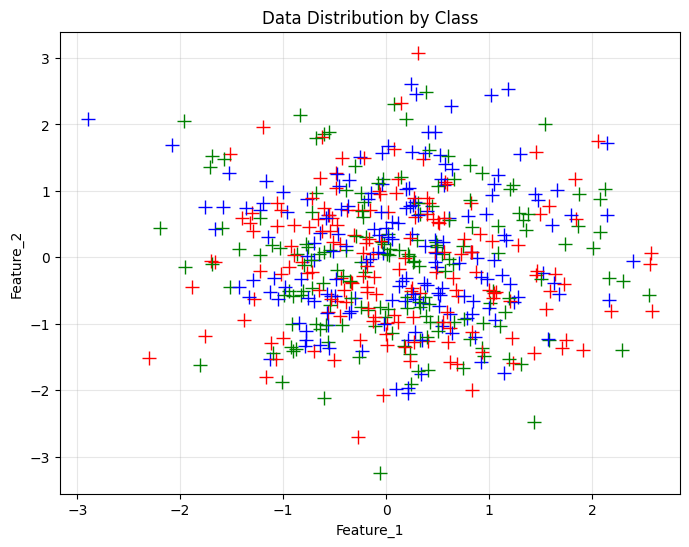

In [38]:
X = df[['Feature_1', 'Feature_2', 'Feature_3']].values.astype(float)
Y_raw = df['Class'].values.astype(int)

Y = np.zeros((Y_raw.size, 3))
Y[np.arange(Y_raw.size), Y_raw] = 1

plt.figure(figsize=(8, 6))
for i in range(len(Y_raw)):
    if Y_raw[i] == 0:
        plt.plot(X[i, 0], X[i, 1], "r+", markersize=10)
    elif Y_raw[i] == 1:
        plt.plot(X[i, 0], X[i, 1], "g+", markersize=10)
    else:
        plt.plot(X[i, 0], X[i, 1], "b+", markersize=10)

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Data Distribution by Class')
plt.grid(True, alpha=0.3)
plt.show()

In [42]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 3
        hiddenLayer1Neurons = 8
        hiddenLayer2Neurons = 6
        outLayerNeurons = 3

        self.learning_rate = 0.02

        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2H1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH2 = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_H1I)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_H2H1)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        output_input = np.dot(self.hidden_output2, self.W_OH2)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error2 = output_delta.dot(self.W_OH2.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2H1.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        self.W_H1I += X.T.dot(hidden_delta1)
        self.W_H2H1 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_OH2 += self.hidden_output2.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

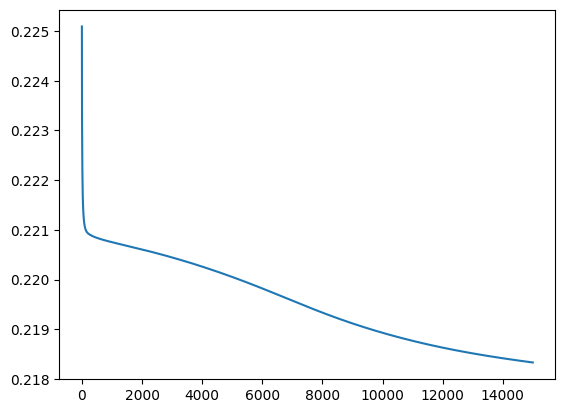

In [48]:
NN = NeuralNetwork()

err = []
for i in range(15000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [49]:
print(NN.feedForward([[.1, -.013, .604]]))

[[0.36172469 0.26815677 0.36546574]]
